# Clustering

## Definition

Clustering is to divide data into groups (label) wherein all observations within each group meet a certain standard of similarity. 

![clustering-example](./images/clustering_example_3.png)

## K-means clustering

### Algorithm Steps

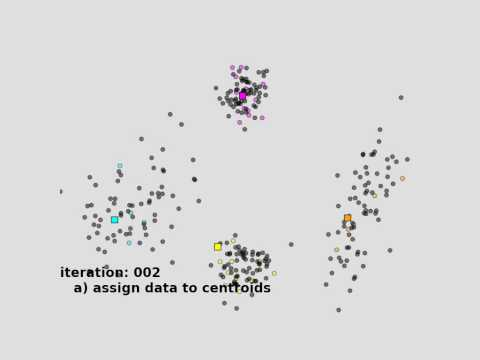

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("5I3Ei69I40s")

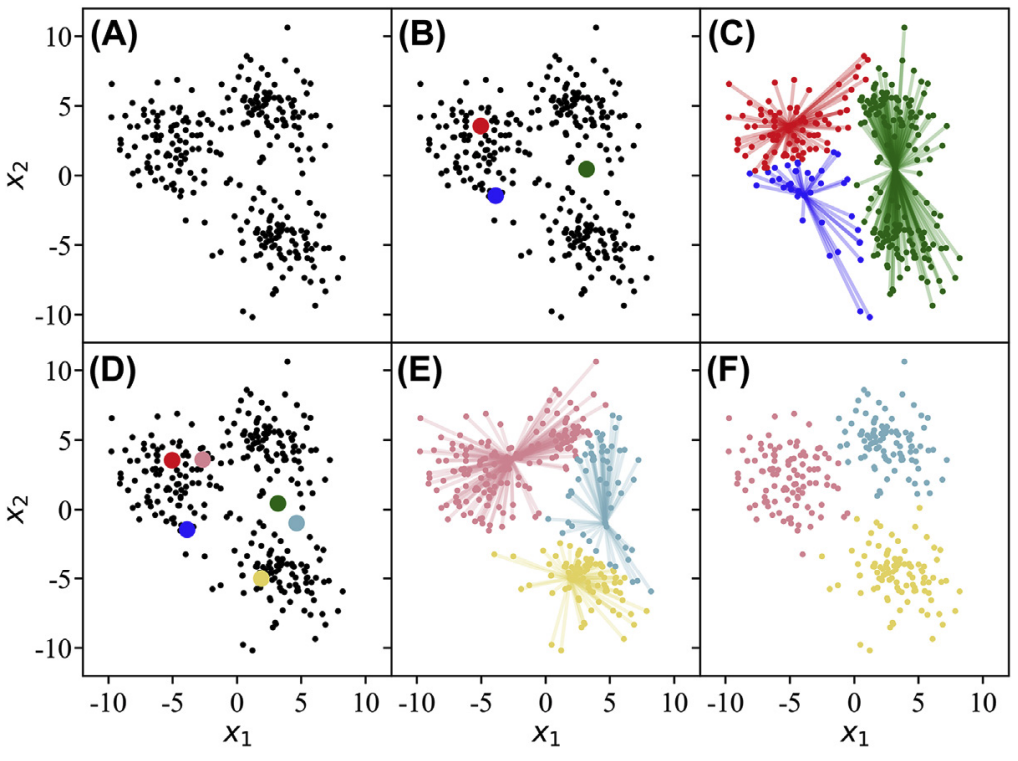

### Pseudo Code

    Asssign a characteristic number from 1 to K to each of N data points randomly
    While cluster assignments keep changing:
        For each of K clusters:
            Calculate cluster centroid
            For each of N points:
                determine point distance to centroid
        For each of N points:
            Assign point to centroid it is closest to

### Objective Function for Kmeans

**Hypothesis:** We can determine what the clusters are by seeking to minimize within-cluster variation. This is obtained by the definition of the centroid belonging to each cluster. The user must define the k expected clusters beforehand.

**Cost:** We define the Within-Cluster-Variation: <br>

$WCV(C_k) = \dfrac{1}{C_k}\sum_{i, j \in C_k}d(x_{i}-x_{j})$, where $d(x_{i}-x_{j})$ is a distance metric of your choice (usually euclidean).

**Optimization:** Random search for best possible exemplar point. 
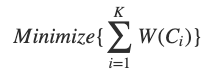

### Random Initialization:

The end result is totally determined by the first random initialization. It can be overcome by bagging or multiple initializations and picking lowest WCV. 

Obviously the number K is of immense importance at several levels. Choosing K is one of the greatest challenges in clustering.
![kmeans-initialization](./images/kmeans_initialization.png)

### Issues with k-means

1.  Centers may get stuck sharing a cluster - More likely to happen with large number of well separated sets of points.
2.  Running time = (number of clusters) x (number of points) - Can use "rough" clustering (e.g. canopy clustering or locality sensitive hashing)
3.  Choosing k - best approach is to understand why you're doing the clustering. 

### Choosing K

One of the unsolved problems in unsupervised learning is determining the ideal value for certain hyperparameters.  For clustering (and topic modelling), this is often a parameter `K` that specifies apriori how many groups you believe to exist in the data.

#### Approach 1: Elbow Method

Often the most basic metric of how well your clustering alorgithm is performing is the within-cluster dispersion.

$$D_{r} = \sum_{i, i' \in C_{r}} d_{ii'}$$

$$J_{k} = \sum_{r = 1}^{k} \frac{1}{2n_{r}}D_{r}$$

The difficulty with this metric is that as you increase $k$, $J_{k}$ monotonically decreases.  So the optimal $k$ is when each data point is its own cluster center, but then this is quite useless.  So our goal then becomes to determine the smallest number of clusters $k$ with the lowest error...

The most basic heuristic is to use a graphical method to determine when we are getting diminishing returns for every increase in $k$.  Aptly named the Elbow method, this technique looks for a kink in the error plot.

![](http://i.stack.imgur.com/BzwBY.png)

But as you can probably tell this is a very imprecise method.  How can we improve on this?

#### Approach 2: Silhouette

Trying to provide a better metric, the Silhouette was described by Peter Rousseeuw in 1986.  It improves upon the Within Cluster Dispersion by also accounting for how similar each point is to every other point in its cluster (rather than just the centroid) as well as neighboring potential clusters.

We define:

$a(i)$ to be the average dissimilarity of point $i$ to every other data point in its cluster.

$b(i)$ is the lowest dissimilarity of point $i$ to any _other_ cluster (neighboring clusters).

$$ s(i) = 1 - \frac{a(i)}{b(i)} \qquad if \qquad a(i) < b(i) $$
$$ s(i) = 0 \qquad if \qquad a(i) = b(i) $$
$$ s(i) = \frac{b(i)}{a(i)} - 1 \qquad  if \qquad a(i) > b(i)$$

The silhouette is defined to be greatest when $a(i) \ll b(i)$.  And it is lowest when $b(i) \gg a(i)$.

With this definition we can see that the silhouette metric ranges from $-1 \leq s(i) \geq 1$.

In contrast to the elbow method, the silhouette does not monotonically decrease as $k$ increases.  Because of this we can simply vary $k$ and look for when the silhouette is at a maximum.

## Proximity Clustering: A basic introduction

Proximity clustering is less of an algorithm and more of an entire field, worthy of a 4 week survey.  It's more important that you understand why it exists and how to understand it. Since the publication of DBSCAN, something like 15 established upgraded versions of the original algorithm exist, i.e. AUTODBSCAN, VDBSCAN, PDBSCAN, DENCLUE, DBSCAN-DLP, GDBSCAN, OPTICS, and so on. Maybe 1000+ other publications have attempted improvements. Research on these algorithms continues at a rapid pace even today.

### Intuition:

The proximity methods **deliberately eliminate any presumption of underlying distributions.** This makes them more of a relative of K-means than probabilistic methods. However unlike K-means, proximity methods do not operate under the assumption of clean decision boundaries between clusters. 

Proximity clustering allows the **clustered data to describe the clusters**. It does this with two parameters, $\epsilon$ and minPoints. Unfortunately, it turns out that these end up being quite a restriction on the applicability of the method. 

### Hypothesis:

We can't make any assumptions about the clusters present, or their density. There could be no clusters, or many.
We describe the relationships in terms of *neighborhoods*.

![dbscan_neighborhood](./images/DBSCAN_neighborhood.png)


A neighborhood is defined as:

1. Having a minimum number of points, minPoints, within it.
2. Points that belong to that neighborhood are no more than $\epsilon$ distance apart.
3. If a point is within another point's neighborhood and that neighborhood is in a cluster, it is labeled as a member of that cluster.
4. Points that don't belong to a cluster are labeled as noise.

You will also see neighborhoods described in terms of their density. This is a reflection of the distance $\epsilon$ and the minPoints number of points that belong to the neighborhood. Any cluster's minimum density is defined in terms of these two parameters: 

$$\rho_{min} \propto \frac{minPoints}{\epsilon}$$

There are two types of relationships worth describing here: *density connectedness* and *density reachability*. If two points are density connected, they fall within each other's neighborhood. In the above diagram, the points *A* are density connected. The points *B* and *C* are density *reachable* but **not** density *connected* to points *A*. They will still be part of the *A* cluster, but these points will not become new centers of the same cluster themselves.


### Cost:

There are no cost functions to minimize here. The algorithm proceeds until it can't change the labels on any of the points.

### Optimization:

There is no function to optimize but we can think of the clustering process as, where the process reaches an optimum when it can't change the labels on points any further.

There are numerous ways to define neighborhoods and distances. The most sophisticated algorithms carefully define neighborhoods into regions of similar density and provide multiple ways to define a cluster.  

Really, that's it!

### DBSCAN

DBSCAN (Density Based Spatial Clustering Analysis with Noise) is the original version of the algorithm and the only one we expect you to learn in detail. As its acronym suggests, it is fast (SCAN) and capable of performing clustering on large databases (DB). One of the reasons it's so fast is because it's so simple. 


### Algorithm:

    Pick an arbitrary point A from the dataset. This is marked as a visited point.
    For all points within eps of A:
        Mark if visited
        Count all points within $\epsilon$ of the original point. This is the neighborhood.
        If there are more than minPoints points within a distance of $\epsilon$ from that point (including the original point itself), label them all as members of a new cluster.
        Recurse:
            For all points in the neighborhood of every point in the cluster, check to see if they also have minPoints within an $\epsilon$ neighborhood. Those that are, are also cluster members.
    
   If a point has been visited by the algorithm and doesn't belong to a cluster yet, it is marked as noise.



###Demonstration:

Heres a great demonstration page for both DBSCAN and K-Means:

http://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

I encourage you to work with this after class.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#### Make moon-shaped and doughnut-shaped data

In [3]:
from sklearn import cluster, datasets
n_samples = 1500

noisy_circles,circle_labels = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)

noisy_moons,moon_labels = datasets.make_moons(n_samples=n_samples, 
                                              noise=.1)

In [4]:
noisy_moons[1:2]

array([[2.12847724, 0.2785995 ]])

In [5]:
noisy_moons=np.array(noisy_moons)
noisy_circles = np.array(noisy_circles)

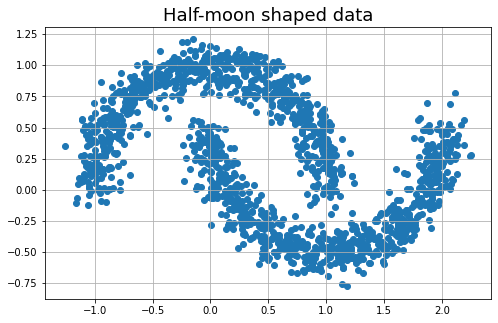

In [6]:
plt.figure(figsize=(8,5))
plt.title("Half-moon shaped data", fontsize=18)
plt.grid(True)
plt.scatter(noisy_moons[:,0],noisy_moons[:,1])
plt.show()

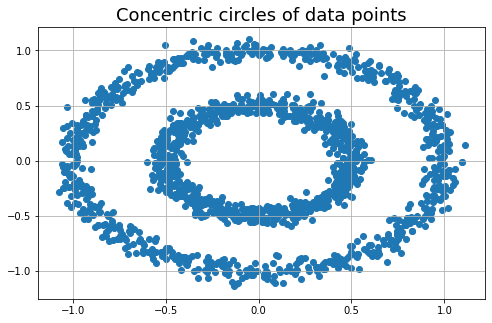

In [7]:
plt.figure(figsize=(8,5))
plt.title("Concentric circles of data points", fontsize=18)
plt.grid(True)
plt.scatter(noisy_circles[:,0],noisy_circles[:,1])
plt.show()

In [8]:
km=cluster.KMeans(n_clusters=2)
km.fit(noisy_moons)

KMeans(n_clusters=2)

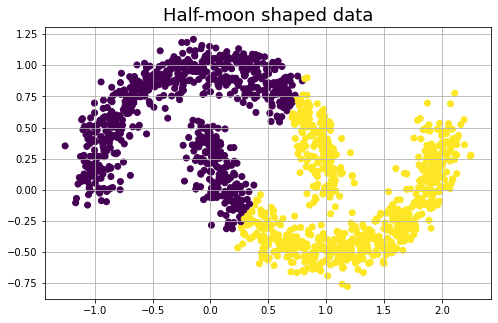

In [9]:
plt.figure(figsize=(8,5))
plt.title("Half-moon shaped data", fontsize=18)
plt.grid(True)
plt.scatter(noisy_moons[:,0],noisy_moons[:,1],c=km.labels_)
plt.show()

In [10]:
km.fit(noisy_circles)

KMeans(n_clusters=2)

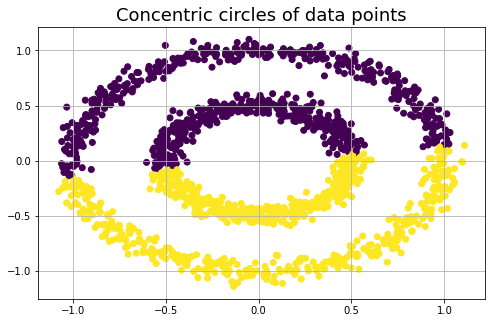

In [11]:
plt.figure(figsize=(8,5))
plt.title("Concentric circles of data points", fontsize=18)
plt.grid(True)
plt.scatter(noisy_circles[:,0],noisy_circles[:,1],c=km.labels_)
plt.show()

#### How does DBSCAN perform?

In [12]:
dbs = cluster.DBSCAN(eps=0.1)

In [13]:
dbs.fit(noisy_moons)

DBSCAN(eps=0.1)

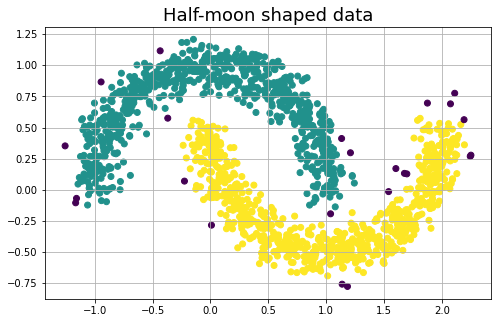

In [14]:
plt.figure(figsize=(8,5))
plt.title("Half-moon shaped data", fontsize=18)
plt.grid(True)
plt.scatter(noisy_moons[:,0],noisy_moons[:,1],c=dbs.labels_)
plt.show()

In [15]:
dbs.fit(noisy_circles)

DBSCAN(eps=0.1)

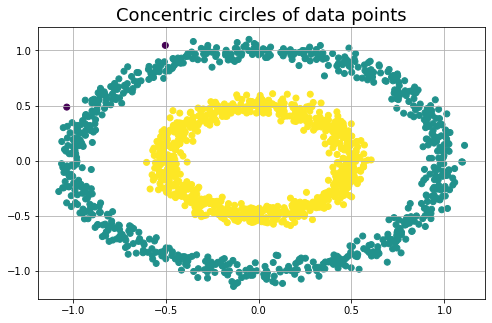

In [16]:
plt.figure(figsize=(8,5))
plt.title("Concentric circles of data points", fontsize=18)
plt.grid(True)
plt.scatter(noisy_circles[:,0],noisy_circles[:,1],c=dbs.labels_)
plt.show()

## Hierarchical Clustering

### Introduction

Suppose we have clusters of both varying density and similar means. How can we address this problem?

![hierarchical-clustering](./images/hierarchical_clustering.png)

Hierarchical clustering is intended to overcome this problem by enabling the scope of the clustering to vary continuously. This is done by constructing a hierarchy tree. Hierarchical clustering is more of a concept rather than a single algorithm; we discuss a basic version of the algorithm here.

### Types

Hierarchical clustering consists of two methods
1.	agglomerative and 
2.	divisive

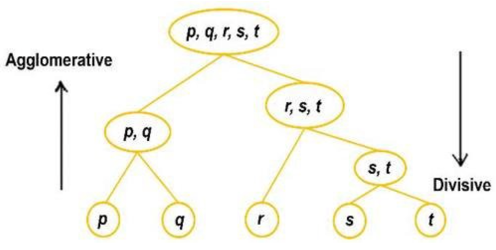

### Hierarchical clustering Algorithm

    Initialize all points to be individual clusters
    While n_clusters != 1:
        For all clusters
            Merge each cluster to its next closest cluster => New cluster
        Count n_clusters

### Reporting a Hierarchical Clustering

Since any set of relationships captured within the tree are technically valid, the question of which of these are to be reported sets the investigator quite a task. We typically report a tree with a **cut** at a given height. Note that the height gives some sense of separation between clusters, along with their geometry. Choosing this height is, however, is a matter of great interest (just as k is above) and will be discussed as above in the next lecture.

### Definitions of Distance

The matter of distance between clusters is also one under great research and actually varies in value from dataset to dataset. Distance is typically called **linkage** in the context of hierarchical clusterings. You still need to use a metric for determining distance between points, however, we also need a way for determining distance between clusters.

![cluster-distance](./images/cluster_distance.png)

In practice it is common to attempt hierarchical clusterings with several different distance metrics (implying some a priori understanding of the data).

![example-trees](./images/example_trees.png)

### Average linkage:

1) insensitive to outliers

2) good comprimise between single and complete linkage

### Complete linkage:

1) less sensitive to outliers

2) sometimes wind up with branches that overlap each other (sensitive to odd distributions)

### Single linkage:

1) More sensitive to outliers

2) Less sensitive to odd distributions